In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)

# Drop species/target (since clustering is unsupervised)
print(f"Original shape: {X.shape}")
X.head()


Original shape: (150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


C:\Users\sumol\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


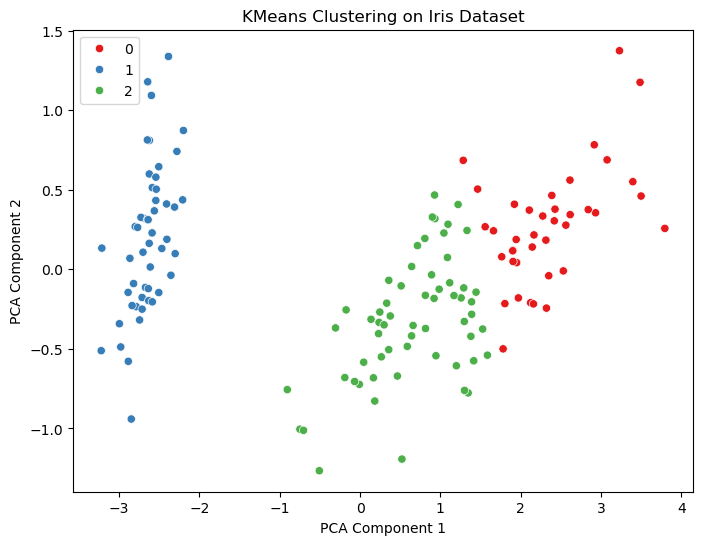

In [5]:
#KMeans Clustering 
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette='Set1')
plt.title("KMeans Clustering on Iris Dataset")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


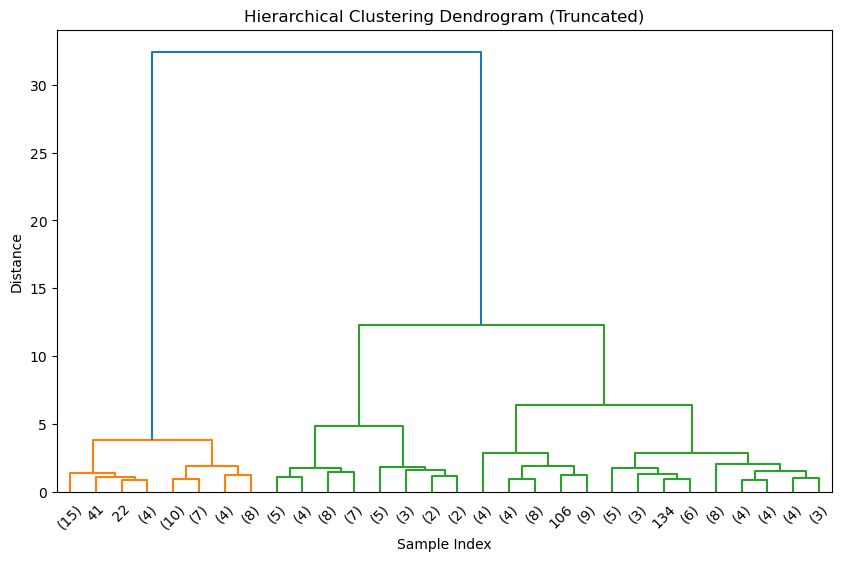

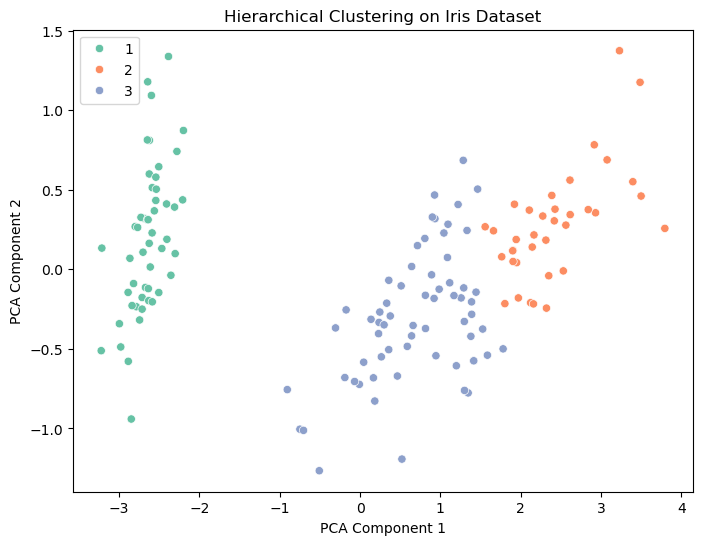

In [7]:
#Hierarchical Clustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Perform hierarchical clustering
linkage_matrix = linkage(X, method='ward')

# Dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, truncate_mode='lastp', p=30)
plt.title("Hierarchical Clustering Dendrogram (Truncated)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

# Assign clusters (cut tree)
hier_labels = fcluster(linkage_matrix, 3, criterion='maxclust')

# Plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=hier_labels, palette='Set2')
plt.title("Hierarchical Clustering on Iris Dataset")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()
